In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
# Number of trials
N = 1000

In [3]:
# Generate random values for x_I
x_I = np.zeros(N)

for i in range (len(x_I)):
    val = randint(0, 3)
    
    if(val == 0):
        x_I[i] = -3
    if(val == 1):
        x_I[i] = -1
    if(val == 2):
        x_I[i] = 1
    if(val == 3):
        x_I[i] = 3

In [4]:
# Generate random values for x_Q
x_Q = np.zeros(N)

for i in range (len(x_Q)):
    val = randint(0, 3)
    
    if(val == 0):
        x_Q[i] = -3
    if(val == 1):
        x_Q[i] = -1
    if(val == 2):
        x_Q[i] = 1
    if(val == 3):
        x_Q[i] = 3

I:


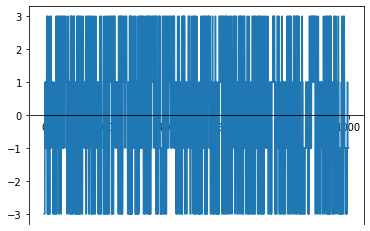

Q:


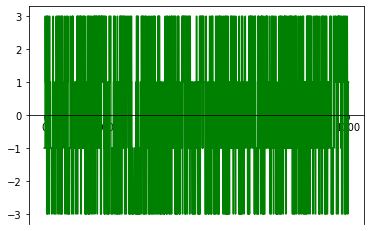

In [21]:
N_samples_sec = 400 #Sample Frequency
t_sample = 1/N_samples_sec # 
t = np.arange(0, len(x_I), t_sample) # Time array
L_t = len(t) # Length of time array


# Nyquist Pulse Shaping: p(t) = rect
Ts = 1

shaped_pulse_I = np.repeat(x_I,N_samples_sec*Ts)
shaped_pulse_Q = np.repeat(x_Q,N_samples_sec*Ts)


#Calculate p(-t)
p = np.zeros(L_t)
p[:N_samples_sec] = 1

p_reversed = np.copy(p)
p_reversed = p_reversed[::-1]


#Plot shaped pulses
print("I:")
plt.plot(t,shaped_pulse_I)
plt.gca().spines['bottom'].set_position('zero')
plt.show()

print("Q:")
plt.plot(t,shaped_pulse_Q,'g')
plt.gca().spines['bottom'].set_position('zero')
plt.show()

In [6]:
def slicer(num):
    if (num < 0 and num >= -2):
        return -1
    elif (num < -2):
        return -3
    elif (num >= 0 and num <= 2):
        return 1
    elif (num > 2):
        return 3
    
def cloud_color(x_I,x_Q):
    if (x_I == -3 and x_Q == -3):
        return 'red'
    elif (x_I == -3 and x_Q == -1):
        return 'blue'
    elif (x_I == -3 and x_Q == 1):
        return 'cyan'
    elif (x_I == -3 and x_Q == 3):
        return 'magenta'
    elif (x_I == -1 and x_Q == -3):
        return 'brown'
    elif (x_I == -1 and x_Q == -1):
        return 'violet'
    elif (x_I == -1 and x_Q == 1):
        return 'tomato'
    elif (x_I == -1 and x_Q == 3):
        return 'teal'
    elif (x_I == 1 and x_Q == -3):
        return 'wheat'
    elif (x_I == 1 and x_Q == -1):
        return 'purple'
    elif (x_I == 1 and x_Q == 1):
        return 'green'
    elif (x_I == 1 and x_Q == 3):
        return 'orange'
    elif (x_I == 3 and x_Q == -3):
        return 'tan'
    elif (x_I == 3 and x_Q == -1):
        return 'lime'
    elif (x_I == 3 and x_Q == 1):
        return 'olive'
    elif (x_I == 3 and x_Q == 3):
        return 'pink'

Modulated In-Phase Signal:


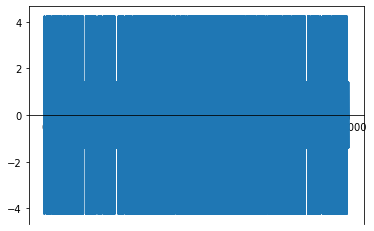

Modulated Quadrature Signal:


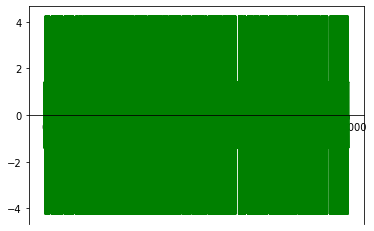

Transmitted Signal:


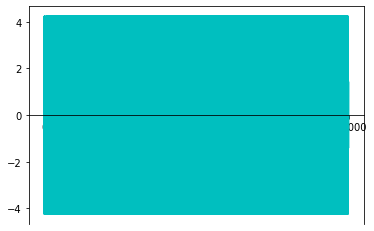

Received Signal:


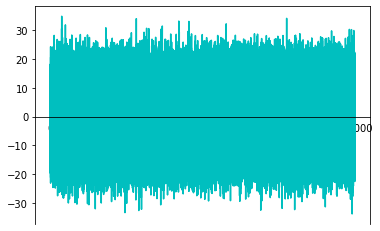

Modulated Signal In-Phase Component:


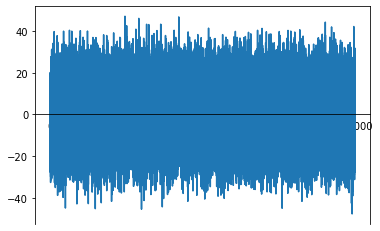

Modulated Signal Quadrature Component:


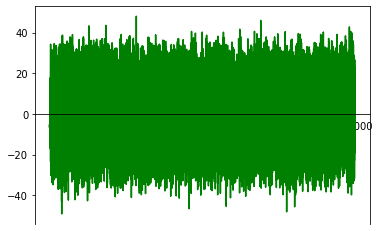

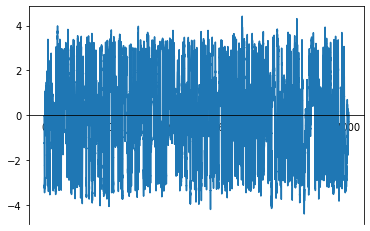

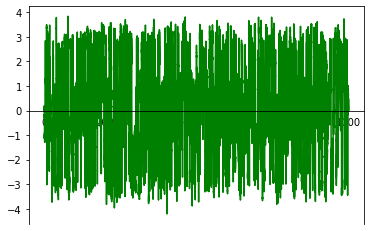

In [22]:
f_c = 100


# Modulate at transmitter
# In-Phase Component
i = 0

for val in shaped_pulse_I:
    shaped_pulse_I[i] = val*np.sqrt(2)*np.cos(2*np.pi*f_c*i/N_samples_sec)
    i = i+1


print("Modulated In-Phase Signal:")
plt.plot(shaped_pulse_I)
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Quadrature Component
i = 0

for val in shaped_pulse_Q:
    shaped_pulse_Q[i] = -val*np.sqrt(2)*np.sin(2*np.pi*f_c*i/N_samples_sec)
    i = i+1

    
print("Modulated Quadrature Signal:")
plt.plot(shaped_pulse_Q,'g')
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Sum the in-phase and quadrature signals
r = shaped_pulse_I + shaped_pulse_Q

print("Transmitted Signal:")
plt.plot(r,'c')
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Add noise to channel
Ep = 1
EpNo_dB = 6
EpNo = 10 ** (EpNo_dB / 10)
No = 1 / EpNo # since Ep=1 is used

sigma = np.sqrt(No * N_samples_sec / 2)

noise = np.random.normal(0, sigma, L_t)
r = r + noise

print("Received Signal:")
plt.plot(r,'c')
plt.gca().spines['bottom'].set_position('zero')
plt.show()


# Modulate at receiver
MF_input_I = np.zeros(len(r))
MF_input_Q = np.zeros(len(r))

i = 0

for val in r:
    MF_input_I[i] = val*np.sqrt(2)*np.cos(2*np.pi*f_c*i/N_samples_sec)
    MF_input_Q[i] = -val*np.sqrt(2)*np.sin(2*np.pi*f_c*i/N_samples_sec)
    
    i = i+1

print("Modulated Signal In-Phase Component:")
plt.plot(MF_input_I)
plt.gca().spines['bottom'].set_position('zero')
plt.show()

print("Modulated Signal Quadrature Component:")
plt.plot(MF_input_Q,'g')
plt.gca().spines['bottom'].set_position('zero')
plt.show()


new_t = np.arange(0, len(x_I)+1, t_sample) # Time array for match filter output


# Pass through pulse matched filter (PMF)
MF_output_I = np.convolve(MF_input_I,p_reversed) / N_samples_sec
MF_output_I = np.trim_zeros(MF_output_I)

MF_output_Q = np.convolve(MF_input_Q,p_reversed) / N_samples_sec
MF_output_Q = np.trim_zeros(MF_output_Q)


# Arrays to store sampled matched filter otuput
sampled_MF_output_I = np.zeros(len(x_I))
sampled_MF_output_Q = np.zeros(len(x_Q))


# In-Phase Component
plt.plot(new_t[:-1],MF_output_I)
plt.gca().spines['bottom'].set_position('zero')

for i in range(len(x_I)):
    num = MF_output_I[(i+1)*N_samples_sec - 1]
    sampled_MF_output_I[i] = num
    
    # x_I_hat = slicer(num)
    
    # plt.stem([i+1],[num],'red',markerfmt='ro')

plt.show()


# Quadrature Component
plt.plot(new_t[:-2],MF_output_Q,'g')
plt.gca().spines['bottom'].set_position('zero')

for i in range(len(x_Q)):
    num = MF_output_Q[(i+1)*N_samples_sec - 1]
    sampled_MF_output_Q[i] = num
    
    # x_Q_hat = slicer(num)

    # plt.stem([i+1],[num],'magenta',markerfmt='mo')

plt.show()

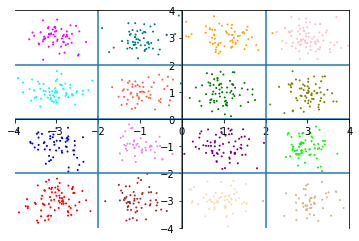

In [23]:
colors = []

# Generate colors array for cloud plot
for i in range(len(x_I)):
    colors.append(cloud_color(x_I[i],x_Q[i]))
    
plt.scatter(sampled_MF_output_I,sampled_MF_output_Q,1,color=colors)
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['left'].set_position('zero')
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.hlines([-2,0,2],-4,4)
plt.vlines([-2,0,2],-4,4)

plt.show()